In [2]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = 'archive (8).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
#   print('The dataset is extracted')

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from cv2 import imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
with_mask = os.listdir('data/with_mask/')
print(with_mask[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [5]:
without_mask = os.listdir('data/without_mask/')
without_mask[:5]

['without_mask_1.jpg',
 'without_mask_10.jpg',
 'without_mask_100.jpg',
 'without_mask_1000.jpg',
 'without_mask_1001.jpg']

In [8]:
print('Number of with mask images:', len(with_mask))
print('Number of without mask images:', len(without_mask))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
# with mask --> 1
# without mask --> 0

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


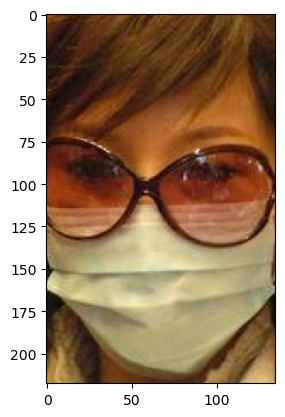

In [12]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

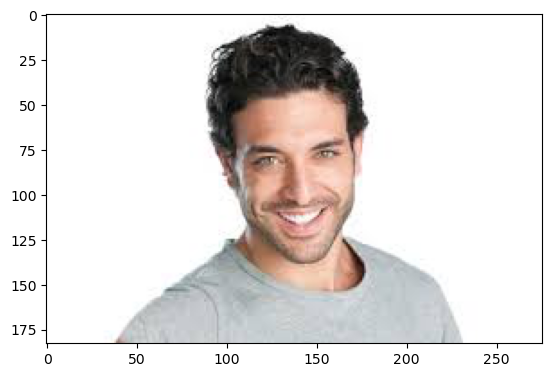

In [15]:
# displaying with mask image
img = mpimg.imread('data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
# convert images to numpy arrays
with_mask_path = 'data/with_mask/'
data = []

for img_file in with_mask:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
without_mask_path = 'data/without_mask/'


for img_file in without_mask:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)

list

In [16]:
len(data)

7553

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
X = np.array(data)
y = np.array(labels)

In [19]:
# split data
X_train , X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

In [28]:
# scaling the data
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [21]:
X_train_scaled[0]

array([[[0.04705882, 0.03921569, 0.05882353],
        [0.04705882, 0.03921569, 0.05882353],
        [0.04705882, 0.03921569, 0.05882353],
        ...,
        [0.24705882, 0.16078431, 0.16862745],
        [0.29803922, 0.21568627, 0.21176471],
        [0.31372549, 0.23529412, 0.23137255]],

       [[0.04705882, 0.03921569, 0.05882353],
        [0.04705882, 0.03921569, 0.05882353],
        [0.04705882, 0.03921569, 0.05882353],
        ...,
        [0.22745098, 0.14117647, 0.14901961],
        [0.27843137, 0.19607843, 0.20392157],
        [0.31372549, 0.23529412, 0.23137255]],

       [[0.04705882, 0.03921569, 0.05882353],
        [0.04705882, 0.03921569, 0.05882353],
        [0.04705882, 0.03921569, 0.05882353],
        ...,
        [0.21176471, 0.13333333, 0.1372549 ],
        [0.26666667, 0.18823529, 0.19215686],
        [0.31372549, 0.23529412, 0.23137255]],

       ...,

       [[0.31372549, 0.29803922, 0.25490196],
        [0.30196078, 0.28235294, 0.23921569],
        [0.3254902 , 0

In [22]:
# building CNN

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
number_of_classes = 2

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
     
    keras.layers.Dense(number_of_classes, activation='softmax')
    
    
])

In [25]:
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'] )

In [26]:
history  = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 166s 966ms/step - loss: 0.5134 - accuracy: 0.7763 - val_loss: 0.2386 - val_accuracy: 0.9074
Epoch 2/5
170/170 [==============================] - 147s 867ms/step - loss: 0.3107 - accuracy: 0.8727 - val_loss: 0.2018 - val_accuracy: 0.9157
Epoch 3/5
170/170 [==============================] - 147s 864ms/step - loss: 0.2420 - accuracy: 0.9064 - val_loss: 0.1685 - val_accuracy: 0.9289
Epoch 4/5
170/170 [==============================] - 148s 872ms/step - loss: 0.2079 - accuracy: 0.9204 - val_loss: 0.1667 - val_accuracy: 0.9504
Epoch 5/5
170/170 [==============================] - 153s 899ms/step - loss: 0.1823 - accuracy: 0.9272 - val_loss: 0.1403 - val_accuracy: 0.9438


In [29]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy: ', accuracy)

48/48 [==============================] - 10s 191ms/step - loss: 0.2132 - accuracy: 0.9239
Test accuracy:  0.9238914847373962
